In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering

from kmodes.kmodes import KModes
import plotly.graph_objects as go
from scipy.cluster.hierarchy import dendrogram

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
customers_data = pd.read_csv("olist_customers_dataset.csv")
orders_data = pd.read_csv("olist_orders_dataset.csv")
order_items_data = pd.read_csv("olist_order_items_dataset.csv")
products_data = pd.read_csv("olist_products_dataset.csv")

In [4]:
customers_data.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0  14409                     franca                 SP             
1  9790                      sao bernardo do campo  SP             
2  1151                      sao paulo              SP             
3  8775                      mogi das cruzes        SP             
4  13056                     campinas               SP

In [5]:
customers_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
orders_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0  delivered    2017-10-02 10:56:33      2017-10-02 11:07:15   
1  delivered    2018-07-24 20:41:37      2018-07-26 03:24:27   
2  delivered    2018-08-08 08:38:49      2018-08-08 08:55:23   
3  delivered    2017-11-18 19:28:06      2017-11-18 19:45:59   
4  delivered    2018-02-13 21:18:39      2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0  2017-10-04 19:55:00          2017-10-10 21:25:13            
1  2018-07-26 14:31:00          2018-08-07 15:27:45            
2  2018-08-08 13:50:00          2018-08-17 18:06:29            
3  2017-11-22 13:39:59          2017-12-02 00:28:42            
4  2018-02-14 19:46:34          2018-02-16 18:17:02            

  order_estimated_delivery_date  
0  2017-10-18 00:00:00           
1  2018-08-13 00:00:00           
2  2018-09-04 00:00:00           
3  2017-12-15 00:00:00           
4  2018-02-26 00:00:00

In [7]:
orders_data.shape

(99441, 8)

In [8]:
orders_data.drop(["order_delivered_carrier_date", "order_delivered_customer_date", 
                  "order_estimated_delivery_date", "order_status"], axis=1, inplace=True)

In [9]:
orders_data["order_approved_at"].isna().sum()

160

In [10]:
orders_data = orders_data[~orders_data["order_approved_at"].isna()]

In [11]:
orders_data.isna().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
order_approved_at           0
dtype: int64

In [12]:
orders_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_purchase_timestamp    order_approved_at  
0  2017-10-02 10:56:33      2017-10-02 11:07:15  
1  2018-07-24 20:41:37      2018-07-26 03:24:27  
2  2018-08-08 08:38:49      2018-08-08 08:55:23  
3  2017-11-18 19:28:06      2017-11-18 19:45:59  
4  2018-02-13 21:18:39      2018-02-13 22:20:29

In [13]:
# Orders and customers dataset merged
result = pd.merge(customers_data, orders_data, on='customer_id')

In [14]:
result.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_purchase_timestamp    0
order_approved_at           0
dtype: int64

In [15]:
result.shape

(99281, 8)

In [16]:
result.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0  14409                     franca                 SP              
1  9790                      sao bernardo do campo  SP              
2  1151                      sao paulo              SP              
3  8775                      mogi das cruzes        SP              
4  13056                     campinas               SP              

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1  2017-05-16 15:05:35       
1  29150127e6685892b6eab3eec79f59c7  2018-01-12 20:48:24       
2  b2059ed67ce144a36e2aa97d2c9e9ad2  2018-05-19 16:07:45       
3  951670f92359f4fe4a63112aa7306eba  2018-03-13 16:06:38       
4  6b7d50bd145f6fc7f33cebabd7e49d0f  2018-07-29 09:51:30       

     order_approved_at  
0  2017-05-16 15:22:12  
1  2018-01-12 20:58:32  
2  2018-05-20 16:19:10  
3  2018-03-13 17:29:19  
4  2018-07-29 10:10:09

In [17]:
order_items_data.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  1               
1  00018f77f2f0320c557190d7a144bdd3  1               
2  000229ec398224ef6ca0657da4fc703e  1               
3  00024acbcdf0a6daa1e931b038114c75  1               
4  00042b26cf59d7ce69dfabb4e55b4fd9  1               

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35  58.90   13.29          
1  2017-05-03 11:05:13  239.90  19.93          
2  2018-01-18 14:48:30  199.00  17.87          
3  2018-08-15 10:10:18  12.99   12.79          
4  2017-02-13 13:57:51  199.90  18.14

In [18]:
order_items_data.shape

(112650, 7)

In [19]:
order_items_data.drop(["seller_id", "shipping_limit_date", "freight_value"], axis=1, inplace=True)

In [20]:
order_items_data.isna().sum()

order_id         0
order_item_id    0
product_id       0
price            0
dtype: int64

In [21]:
# Orders, customers and orders_items dataset merged
result2 = pd.merge(result, order_items_data, on='order_id')

In [22]:
result2.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
order_id                    0
order_purchase_timestamp    0
order_approved_at           0
order_item_id               0
product_id                  0
price                       0
dtype: int64

In [23]:
result2.shape

(112635, 11)

In [24]:
products_data.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5  perfumaria              
1  3aa071139cb16b67ca9e5dea641aaa2f  artes                   
2  96bd76ec8810374ed1b65e291975717f  esporte_lazer           
3  cef67bcfe19066a932b7673e239eb23d  bebes                   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0  40.0                 287.0                       1.0                  
1  44.0                 276.0                       1.0                  
2  46.0                 250.0                       1.0                  
3  27.0                 261.0                       1.0                  
4  37.0                 402.0                       4.0                  

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0  225.0             16.0               10.0               14.0              
1  1000.0            30.0               18.0               20.0              
2  154.0             18.0               9.0                15.0              
3  371.0             26.0               4.0                26.0              
4  625.0             20.0               17.0               13.0

In [25]:
products_data.shape

(32951, 9)

In [26]:
products_data.drop(["product_name_lenght", "product_description_lenght",
                    "product_photos_qty", "product_weight_g", 
                    "product_length_cm", "product_height_cm", "product_width_cm"],
                    axis=1, inplace=True)

In [27]:
products_data["product_category_name"].isna().sum()

610

In [28]:
products_data = products_data[~products_data["product_category_name"].isna()]

In [29]:
# Orders, customers, orders_items and products dataset merged
donnees = pd.merge(result2, products_data, on='product_id')

In [30]:
donnees.shape

(111033, 12)

In [31]:
donnees.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2  8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3  f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4  6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   

   customer_zip_code_prefix    customer_city customer_state  \
0  14409                     franca           SP              
1  68030                     santarem         PA              
2  68030                     santarem         PA              
3  92480                     nova santa rita  RS              
4  25931                     mage             RJ              

                           order_id order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1  2017-05-16 15:05:35       
1  c1d2b34febe9cd269e378117d6681172  2017-11-09 00:50:13       
2  c1d2b34febe9cd269e378117d6681172  2017-11-09 00:50:13       
3  b1a5d5365d330d10485e0203d54ab9e8  2017-05-07 20:11:26       
4  2e604b3614664aa66867856dba7e61b7  2018-02-03 19:45:40       

     order_approved_at  order_item_id                        product_id  \
0  2017-05-16 15:22:12  1              a9516a079e37a9c9c36b9b78b10169e8   
1  2017-11-10 00:47:48  1              a9516a079e37a9c9c36b9b78b10169e8   
2  2017-11-10 00:47:48  2              a9516a079e37a9c9c36b9b78b10169e8   
3  2017-05-08 22:22:56  1              a9516a079e37a9c9c36b9b78b10169e8   
4  2018-02-04 22:29:19  1              a9516a079e37a9c9c36b9b78b10169e8   

    price product_category_name  
0  124.99  moveis_escritorio     
1  112.99  moveis_escritorio     
2  112.99  moveis_escritorio     
3  124.99  moveis_escritorio     
4  106.99  moveis_escritorio

In [32]:
donnees.dtypes

customer_id                 object 
customer_unique_id          object 
customer_zip_code_prefix    int64  
customer_city               object 
customer_state              object 
order_id                    object 
order_purchase_timestamp    object 
order_approved_at           object 
order_item_id               int64  
product_id                  object 
price                       float64
product_category_name       object 
dtype: object

In [33]:
####### RFM ###########

In [34]:
# Distribution of customers by city of Brazil
distribution = donnees[['customer_city', 'customer_unique_id']].\
                        groupby(['customer_city']).agg('count').reset_index().\
                        sort_values('customer_unique_id', ascending=False)
distribution.rename(columns={'customer_unique_id': 'nombre clients'}, inplace=True)
distribution.head()

customer_city  nombre clients
3576  sao paulo       17512         
3136  rio de janeiro  7709          
451   belo horizonte  3089          
556   brasilia        2360          
1139  curitiba        1734

In [35]:
# Verify if all the price are positive
donnees.price.min()

0.85

In [36]:
def unique_counts(df):
    """Returns the unique number of value per variable."""
    for i in df.columns:
        count = df[i].nunique()
        print("%s : %d" %( i, count))
        
        
unique_counts(donnees)

customer_id : 97264
customer_unique_id : 94096
customer_zip_code_prefix : 14927
customer_city : 4095
customer_state : 27
order_id : 97264
order_purchase_timestamp : 96729
order_approved_at : 88976
order_item_id : 21
product_id : 32338
price : 5902
product_category_name : 73


In [37]:
# Search for the earliest date 
ancien = donnees["order_purchase_timestamp"].min()
ancien

'2016-09-04 21:15:19'

In [38]:
# search for the most recent date
recent = donnees["order_purchase_timestamp"].max()
recent

'2018-09-03 09:06:57'

In [39]:
import datetime as dt
aammjj = str.split(str.split(recent)[0], "-")
NOW = dt.datetime(int(aammjj[0]), int(aammjj[1]), int(aammjj[2]))

In [40]:
# Change the type of "order_purchase_timestamp" at datetime 
donnees["order_purchase_timestamp"] = pd.to_datetime(donnees["order_purchase_timestamp"])

In [41]:
# Set up the RFM table
#
# Recency: number of days elapsed since last purchase
# 
# Frequency: the number of times the customer has made a purchase
#
# Monetary: the total amount spent by a client
rfmTable = donnees.groupby('customer_unique_id').\
                   agg({"order_purchase_timestamp": lambda x: (NOW - x.max()).days,
                        "customer_unique_id": lambda x: len(x), "price": lambda x: sum(x)})

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'recency', 
                         'customer_unique_id': 'frequency', 
                         'price': 'monetary_value'}, inplace=True)

rfmTable.head()

recency  frequency  monetary_value
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2  115      1          129.90        
0000b849f77a49e4a4ce2b2a4ca5be3f  118      1          18.90         
0000f46a3911fa3c0805444483337064  541      1          69.00         
0000f6ccb0745a6a4b88665a16c9f078  325      1          25.99         
0004aac84e0df4da2b147fca70cf8255  292      1          180.00

In [42]:
quartiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])    # Calculate quartile values for the dataset
print(quartiles)

      recency  frequency  monetary_value
0.25  118.0    1.0        47.9          
0.50  222.0    1.0        89.8          
0.75  351.0    1.0        155.8         


In [43]:
quartiles = quartiles.to_dict()    # Trsnformation dataframe to dictionary
quartiles

{'recency': {0.25: 118.0, 0.5: 222.0, 0.75: 351.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 47.9, 0.5: 89.8, 0.75: 155.8}}

In [44]:
segmented_rfm = rfmTable.copy()

In [45]:
def RScore(x,p,d):
    """Returns the recent score for a value relative to quartile value"""
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    """Returns the frequency and monetary score  for a value relative to quartile value"""
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [46]:
# Table RFM with score 
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore,
                                                             args=('recency',quartiles)
                                                            )
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore,
                                                               args=('frequency',quartiles)
                                                              )
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore,
                                                                    args=('monetary_value',quartiles)
                                                                   )

segmented_rfm['RFMScore'] = (segmented_rfm["r_quartile"].astype(str) + "-").\
                                str.cat(segmented_rfm["f_quartile"].astype(str) + "-").\
                                str.cat(segmented_rfm["m_quartile"].astype(str))

segmented_rfm.head()

recency  frequency  monetary_value  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2  115      1          129.90           
0000b849f77a49e4a4ce2b2a4ca5be3f  118      1          18.90            
0000f46a3911fa3c0805444483337064  541      1          69.00            
0000f6ccb0745a6a4b88665a16c9f078  325      1          25.99            
0004aac84e0df4da2b147fca70cf8255  292      1          180.00           

                                  r_quartile  f_quartile  m_quartile RFMScore  
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2  1           4           2           1-4-2    
0000b849f77a49e4a4ce2b2a4ca5be3f  1           4           4           1-4-4    
0000f46a3911fa3c0805444483337064  4           4           3           4-4-3    
0000f6ccb0745a6a4b88665a16c9f078  3           4           4           3-4-4    
0004aac84e0df4da2b147fca70cf8255  3           4           1           3-4-1

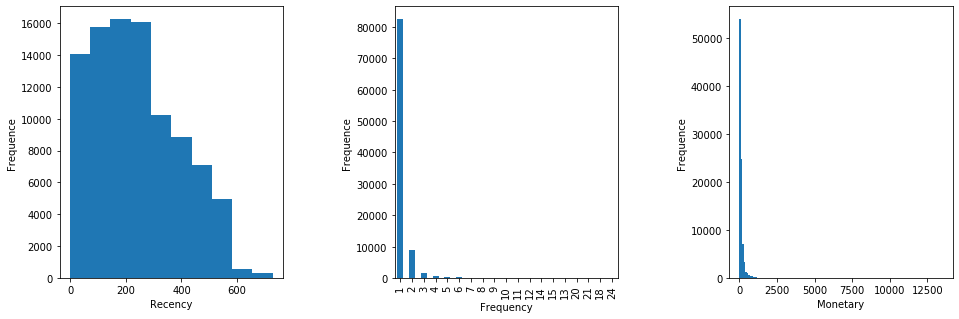

In [47]:
def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins

r = segmented_rfm['recency']
m = segmented_rfm['monetary_value']

plt.figure(figsize=(16, 5))
plt.subplots_adjust(wspace= 0.5)

# Recency
plt.subplot(131)
plt.xlabel('Recency')
plt.ylabel('Frequence')
counts, bins = np.histogram(r)
plt.hist(bins[:-1], bins, weights=counts)

# Frequency
plt.subplot(132)
plt.xlabel('Frequency')
plt.ylabel('Frequence')
segmented_rfm['frequency'].value_counts().plot(kind="bar", width=0.5)

# Monetary
plt.subplot(133)
plt.xlabel('Monetary')
plt.ylabel('Frequence')
bins = compute_histogram_bins(m, 100)
plt.hist(m, bins=bins)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x19cc243fb48>,
 'caps': [<matplotlib.lines.Line2D at 0x19cc243fc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cc243f108>],
 'medians': [<matplotlib.lines.Line2D at 0x19cc2442c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cc2448408>],
 'means': []}

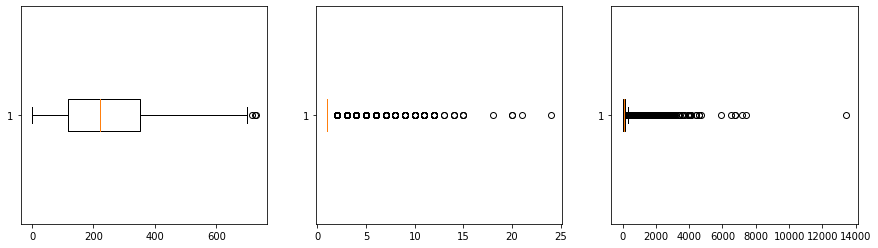

In [48]:
fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(131)
ax.boxplot(segmented_rfm["recency"], vert=False)

ax = fig.add_subplot(132)
ax.boxplot(segmented_rfm["frequency"], vert=False)

ax = fig.add_subplot(133)
ax.boxplot(segmented_rfm["monetary_value"], vert=False)

In [49]:
segmented_rfm['RFMScore'].unique()

array(['1-4-2', '1-4-4', '4-4-3', '3-4-4', '3-4-1', '2-4-2', '2-4-4',
       '2-1-1', '4-4-2', '4-4-4', '3-4-3', '2-4-3', '4-1-1', '1-4-3',
       '1-1-1', '4-4-1', '3-4-2', '1-1-3', '4-1-3', '1-1-2', '2-4-1',
       '3-1-1', '3-1-2', '1-4-1', '2-1-3', '2-1-2', '3-1-4', '4-1-2',
       '3-1-3', '2-1-4', '1-1-4', '4-1-4'], dtype=object)

In [50]:
mean_var = segmented_rfm.groupby("RFMScore")[["recency", "frequency",
                                              "monetary_value"]].agg([np.mean, np.var])
mean_var["size"] = segmented_rfm.groupby('RFMScore')[['recency']].agg([np.size]) 
mean_var

recency              frequency           monetary_value  \
                mean          var      mean       var           mean   
RFMScore                                                               
1-1-1     64.630904   1109.422758  2.707152  2.155911  380.121849      
1-1-2     63.051862   1137.439384  2.289894  0.512388  119.324309      
1-1-3     63.293561   1148.401325  2.229167  0.522336  68.252500       
1-1-4     61.265560   1162.829184  2.215768  0.461584  33.117220       
1-4-1     61.825454   1095.435910  1.000000  0.000000  363.887313      
1-4-2     62.586110   1107.278022  1.000000  0.000000  118.394481      
1-4-3     59.318320   1126.652312  1.000000  0.000000  65.701767       
1-4-4     60.673228   1118.389717  1.000000  0.000000  29.180155       
2-1-1     170.891123  948.560657   2.744105  2.434819  336.939570      
2-1-2     170.325093  890.595917   2.275649  0.482092  119.758245      
2-1-3     168.047826  881.906204   2.160870  0.270361  69.251435       
2-1-4     171.207692  779.246273   2.207692  0.335076  34.317231       
2-4-1     168.682026  882.075461   1.000000  0.000000  350.744261      
2-4-2     168.911470  927.035057   1.000000  0.000000  119.677401      
2-4-3     170.302667  905.192349   1.000000  0.000000  65.725910       
2-4-4     171.799509  862.783986   1.000000  0.000000  29.250918       
3-1-1     282.185348  1254.574858  2.649817  1.874349  381.802557      
3-1-2     282.509390  1140.492274  2.291080  0.401659  120.371984      
3-1-3     282.086444  1207.252355  2.253438  0.488792  68.386110       
3-1-4     284.693966  1419.252258  2.129310  0.216973  33.716681       
3-4-1     282.460756  1264.169346  1.000000  0.000000  340.051904      
3-4-2     281.395503  1239.777281  1.000000  0.000000  117.515559      
3-4-3     280.509776  1255.599638  1.000000  0.000000  65.458535       
3-4-4     280.183014  1242.469240  1.000000  0.000000  28.918639       
4-1-1     456.135802  5480.722070  2.581070  1.428142  370.752313      
4-1-2     448.521429  5464.355763  2.328571  0.641529  118.851100      
4-1-3     456.718095  4831.802057  2.207619  0.374751  68.310705       
4-1-4     465.767442  4662.499070  2.205980  1.457431  35.110532       
4-4-1     458.465131  5398.831400  1.000000  0.000000  363.209942      
4-4-2     457.546237  4910.346010  1.000000  0.000000  115.432580      
4-4-3     450.874092  5029.504263  1.000000  0.000000  64.681376       
4-4-4     459.338145  5128.199546  1.000000  0.000000  28.642948       

                         size  
                    var        
RFMScore                       
1-1-1     166841.316638  1482  
1-1-2     360.101001     752   
1-1-3     141.533566     528   
1-1-4     82.651195      241   
1-4-1     136174.615262  4463  
1-4-2     346.841552     5313  
1-4-3     142.068663     5262  
1-4-4     106.115662     5741  
2-1-1     69509.701178   1442  
2-1-2     349.200441     809   
2-1-3     135.162039     460   
2-1-4     78.294890      260   
2-4-1     98455.408941   4384  
2-4-2     379.386813     5083  
2-4-3     155.987198     5174  
2-4-4     107.397876     5706  
3-1-1     240905.855754  1365  
3-1-2     341.085969     852   
3-1-3     138.718095     509   
3-1-4     80.443344      232   
3-4-1     82617.401418   4523  
3-4-2     392.846350     4981  
3-4-3     155.031701     5626  
3-4-4     104.627252     5475  
4-1-1     148288.779554  1215  
4-1-2     301.635610     700   
4-1-3     146.326834     525   
4-1-4     72.028264      301   
4-4-1     134146.529392  4646  
4-4-2     366.006590     4996  
4-4-3     134.182857     5369  
4-4-4     109.586501     5681

In [118]:
# Contingency table
# Recency X frequency, Recency X Monetary_value, Frequency X Monetary_value
RF = pd.DataFrame(columns=['1', '2', '3', '4'])
RM = pd.DataFrame(columns=['1', '2', '3', '4'])
FM = pd.DataFrame(columns=['1', '2', '3', '4'])
size = segmented_rfm.shape[0]
for i in range(1, 5):
    row_crf = []
    row_crm = []
    row_cfm = []
    for j in range(1, 5):
        crf = 0
        crm = 0
        cfm = 0
        for k, row in segmented_rfm.iterrows():
            if row["r_quartile"] == i and row["f_quartile"] == j:
                crf += 1
            if row["r_quartile"] == i and row["m_quartile"] == j:
                crm += 1
            if row["f_quartile"] == i and row["m_quartile"] == j:
                cfm += 1
        row_crf.append(crf)
        row_crm.append(crm)
        row_cfm.append(cfm)
    RF.loc[i] = row_crf
    RM.loc[i] = row_crm
    FM.loc[i] = row_cfm

In [119]:
RF.style.set_caption("Recency X Frequency")
RF

1  2  3      4
1  3003  0  0  20779
2  2971  0  0  20347
3  2958  0  0  20605
4  2741  0  0  20692

In [120]:
RM.style.set_caption("Recency X Monetary")
RM

1     2     3     4
1  5945  6065  5790  5982
2  5826  5892  5634  5966
3  5888  5833  6135  5707
4  5861  5696  5894  5982

In [121]:
FM.style.set_caption("frequency X Monetary")
FM

1      2      3      4
1  5504   3113   2022   1034 
2  0      0      0      0    
3  0      0      0      0    
4  18016  20373  21431  22603

In [59]:
customer_segment = pd.DataFrame()
segment = ["Best Customers", "Loyal Customers", "Big Spenders", "Almost Lost",
           "Lost Customers", "Lost Cheap Customers", "Autres"
          ]
rfm = ["1-1-1", "X-1-X", "X-X-1", "3-1-1", "4-1-1", "4-4-4", "Autres"]
description = ["Les clients qui ont acheté le plus récemment, le plus souvent \
               et qui dépensent le plus.",
               "Les clients ayant acheté le plus récemment",
               "Les clients qui dépensent le plus",
               "N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment \
               et ont dépensé le plus.",
               "N'ont pas acheté depuis longtemps, mais ont acheté fréquemment et ont \
               dépensé le plus.",
               "Dernier achat il y a longtemps, acheté peu et dépensé peu.",
               ""
              ]
marketing = ["Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité",
             "Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.",
             "Commercialisez vos produits les plus chers.",
             "Offrez d'autres produits pertinents et des rabais spéciaux.",
             "Incitations à des prix agressifs",
             "Ne passez pas trop de temps à essayer de vous ré-acquérir.",
             "Ajuster les intervales pour le réduire si important"
            ]
customer_segment["rfm"] = rfm
customer_segment["segments clients"] = segment 

In [60]:
sums = []
X1X = ["1-1-2", "1-1-3", "1-1-4", "2-1-1", "2-1-2", "2-1-3", "2-1-4"]
XX1 = ["1-2-1", "1-3-1", "1-4-1", "2-2-1", "2-3-1", "2-4-1"]
for r in rfm:
    count = 0
    if r == "X-1-X":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] in X1X:
                count += 1
        sums.append(count)
    if r == "X-X-1":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] in XX1 and r != "2-1-1":
                count += 1
        sums.append(count)
    if r != "X-1-X" and r != "X-X-1" and r != "Autres":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] == r:
                count += 1
        sums.append(count)
    if r == "Autres":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] not in rfm and row["RFMScore"] not in X1X and \
            row["RFMScore"] not in XX1:
                count += 1
        sums.append(count)
        
customer_segment["nombre de clients"] = sums

In [61]:
customer_segment["activité"] = description
customer_segment["Conseil d'action"] = marketing

# Customer/segment
customer_segment

rfm      segments clients  nombre de clients  \
0  1-1-1   Best Customers        1482                
1  X-1-X   Loyal Customers       4492                
2  X-X-1   Big Spenders          8847                
3  3-1-1   Almost Lost           1365                
4  4-1-1   Lost Customers        1215                
5  4-4-4   Lost Cheap Customers  5681                
6  Autres  Autres                71014               

                                                                                                       activité  \
0  Les clients qui ont acheté le plus récemment, le plus souvent                et qui dépensent le plus.         
1  Les clients ayant acheté le plus récemment                                                                     
2  Les clients qui dépensent le plus                                                                              
3  N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment                et ont dépensé le plus.   
4  N'ont pas acheté depuis longtemps, mais ont acheté fréquemment et ont                dépensé le plus.          
5  Dernier achat il y a longtemps, acheté peu et dépensé peu.                                                     
6                                                                                                                 

                                                                     Conseil d'action  
0  Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité              
1  Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.  
2  Commercialisez vos produits les plus chers.                                         
3  Offrez d'autres produits pertinents et des rabais spéciaux.                         
4  Incitations à des prix agressifs                                                    
5  Ne passez pas trop de temps à essayer de vous ré-acquérir.                          
6  Ajuster les intervales pour le réduire si important

In [62]:
customer_segment_ = pd.DataFrame()
segment_ = ["Best Customers", "Loyal Customers", "Promissing", "Big Spenders",
            "Almost Lost", "Lost Customers", "Lost Cheap Customers", "Autres"
           ]
description_ = ["Les clients qui ont acheté le plus récemment, le plus souvent \
                et qui dépensent le plus.",
                "Les clients ayant acheté le plus récemment",
                "Des acheteurs récents, mais qui n'ont pas beaucoup dépensé",
                "Les clients qui dépensent le plus",
                "N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment \
                et ont dépensé le plus.",
                "N'ont pas acheté depuis longtemps, mais ont acheté fréquemment \
                et ont dépensé le plus.",
                "Dernier achat il y a longtemps, acheté peu et dépensé peu.",
                ""
               ]
marketing_ = ["Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité",
              "Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.",
              "offrir des essais gratuits",
              "Commercialisez vos produits les plus chers.",
              "Offrez d'autres produits pertinents et des rabais spéciaux.",
              "Incitations à des prix agressifs",
              "Ne passez pas trop de temps à essayer de vous ré-acquérir.",
              "Ajuster les intervales pour le réduire si important"
             ]
customer_segment_["segment"] = segment_

In [63]:
recents_ = []
def countCustomerSegment(segmented_rfmp):
    """Main function is to return the customer identities for each segment"""
    seg_cus_id = {"Best Customers": [], "Loyal Customers": [], "Promissing": [],
                  "Big Spenders": [],"Almost Lost": [], "Lost Customers": [],
                  "Lost Cheap Customers": [], "Autres": []}
    sums_ = []
    best = ["1-1-1"]
    X1X_ = ["1-1-2", "1-1-3", "1-1-4", "2-1-1", "2-1-2", "2-1-3", "2-1-4", "1-4-2", "2-4-2"]
    promiss = ["1-4-3", "1-4-4", "2-4-3", "2-4-4"]
    XX1_ = ["1-2-1", "1-3-1", "1-4-1", "2-3-1", "2-4-1"]
    almost_lost = ["3-1-1", "3-4-1", "3-4-2"]
    lost = ["3-4-3", "3-4-4", "4-1-1", "4-4-1", "4-4-2"]
    lost_cheap = ["4-4-4", "4-4-3"]
    for s in segment_:
        count = 0
        rec = 0
        if s == "Best Customers":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in best:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Loyal Customers":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in X1X_:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Promissing":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in promiss:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Big Spenders":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in XX1_:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Almost Lost":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in almost_lost:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Lost Customers":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in lost:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Lost Cheap Customers":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in lost_cheap:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Autres":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] not in best and row["RFMScore"] not in X1X_ \
                and row["RFMScore"] not in XX1_ and row["RFMScore"] not in promiss and \
                row["RFMScore"] not in lost and row["RFMScore"] not in almost_lost and \
                row["RFMScore"] not in lost_cheap:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
                    
        sums_.append(count)
        recents_.append(int(rec/count))
        
    return (seg_cus_id,sums_)

In [64]:
cus_id, customer_segment_["nombre de clients"] = countCustomerSegment(segmented_rfm)
customer_segment_["description"] = description_
customer_segment_["marketing"] = marketing_

#customer/segment
customer_segment_

segment  nombre de clients  \
0  Best Customers        1482                
1  Loyal Customers       14888               
2  Promissing            21883               
3  Big Spenders          8847                
4  Almost Lost           10869               
5  Lost Customers        21958               
6  Lost Cheap Customers  11050               
7  Autres                3119                

                                                                                                     description  \
0  Les clients qui ont acheté le plus récemment, le plus souvent                 et qui dépensent le plus.         
1  Les clients ayant acheté le plus récemment                                                                      
2  Des acheteurs récents, mais qui n'ont pas beaucoup dépensé                                                      
3  Les clients qui dépensent le plus                                                                               
4  N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment                 et ont dépensé le plus.   
5  N'ont pas acheté depuis longtemps, mais ont acheté fréquemment                 et ont dépensé le plus.          
6  Dernier achat il y a longtemps, acheté peu et dépensé peu.                                                      
7                                                                                                                  

                                                                            marketing  
0  Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité              
1  Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.  
2  offrir des essais gratuits                                                          
3  Commercialisez vos produits les plus chers.                                         
4  Offrez d'autres produits pertinents et des rabais spéciaux.                         
5  Incitations à des prix agressifs                                                    
6  Ne passez pas trop de temps à essayer de vous ré-acquérir.                          
7  Ajuster les intervales pour le réduire si important

Text(0, 0.5, 'Nombre de clients par segments')

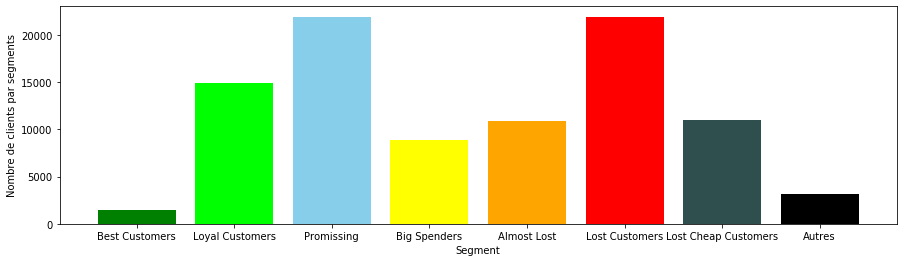

In [65]:
plt.figure(figsize=(15, 4))
plt.bar(customer_segment_["segment"], customer_segment_["nombre de clients"], align='center',
        color=["green", "lime", "#87ceeb", "yellow", "orange", "red", "#2F4F4F", "black"]
       )
plt.xlabel('Segment')
plt.ylabel('Nombre de clients par segments')

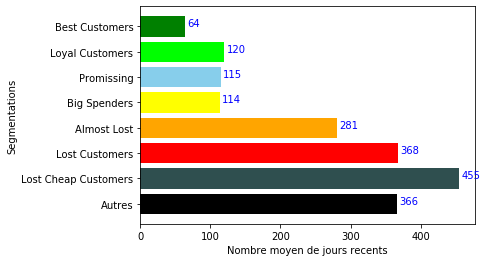

In [66]:
fig, ax = plt.subplots() 
ax.barh(customer_segment_["segment"].iloc[::-1] , recents_[::-1],
        color=["black", "#2F4F4F", "red", "orange", "yellow","#87ceeb", "lime", "green"]
       )
plt.xlabel('Nombre moyen de jours recents')
plt.ylabel('Segmentations')
for i, v in enumerate(recents_[::-1]):
    ax.text(v + 3, i + .0, str(v), color='blue')

In [67]:
XRFM = segmented_rfm[["recency", "frequency", "monetary_value"]].copy()
segments_labels = []
for i, row in XRFM.iterrows():
    if i in cus_id["Best Customers"]:
        segments_labels.append("Best Customers")
        continue
    if i in cus_id["Loyal Customers"]:
        segments_labels.append("Loyal Customers")
        continue
    if i in cus_id["Promissing"]:
        segments_labels.append("Promissing")
        continue
    if i in cus_id["Big Spenders"]:
        segments_labels.append("Big Spenders")
        continue
    if i in cus_id["Almost Lost"]:
        segments_labels.append("Almost Lost")
        continue
    if i in cus_id["Lost Customers"]:
        segments_labels.append("Lost Customers")
        continue
    if i in cus_id["Lost Cheap Customers"]:
        segments_labels.append("Lost Cheap Customers")
        continue
    if i in cus_id["Autres"]:
        segments_labels.append("Autres")
        continue

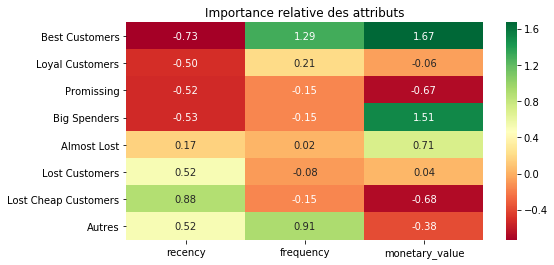

In [68]:
relative_imp_sort = pd.DataFrame()
XRFM["segment_appartenance"] = segments_labels

population = segmented_rfm[["recency", "frequency", "monetary_value"]].copy()
population_avg = population.mean()

cluster_avg = XRFM.groupby(['segment_appartenance']).mean()
relative_imp = cluster_avg / population_avg - 1

relative_imp_sort["Best Customers"] = relative_imp.loc["Best Customers"]
relative_imp_sort["Loyal Customers"] = relative_imp.loc["Loyal Customers"]
relative_imp_sort["Promissing"] = relative_imp.loc["Promissing"]
relative_imp_sort["Big Spenders"] = relative_imp.loc["Big Spenders"]
relative_imp_sort["Almost Lost"] = relative_imp.loc["Almost Lost"]
relative_imp_sort["Lost Customers"] = relative_imp.loc["Lost Customers"]
relative_imp_sort["Lost Cheap Customers"] = relative_imp.loc["Lost Cheap Customers"]
relative_imp_sort["Autres"] = relative_imp.loc["Autres"]

plt.figure(figsize=(8, 4))
ax = sns.heatmap(data=relative_imp_sort.T, annot=True, fmt='.2f', cmap='RdYlGn')
ax.set_ylim(len(relative_imp), 0)
plt.title('Importance relative des attributs')
plt.show()

In [69]:
# Maintenance

In [134]:
# Retrieve the last three months
past = {}
for i in range(0, 4):
    past[i] = dt.datetime(int(aammjj[0]), int(aammjj[1])-i, int(aammjj[2]))
past

{0: datetime.datetime(2018, 9, 3, 0, 0),
 1: datetime.datetime(2018, 8, 3, 0, 0),
 2: datetime.datetime(2018, 7, 3, 0, 0),
 3: datetime.datetime(2018, 6, 3, 0, 0)}

In [135]:
customerPast = donnees[donnees["order_purchase_timestamp"] < past[3]]
customer_retain = customerPast["customer_unique_id"].unique()

In [136]:
dist = {}
cus_id_list = {}
dict_rfmTable = {}
for i in range(0, 4):
    customerPast = donnees[donnees["order_purchase_timestamp"] < past[i]]
    customerPast = customerPast[customerPast["customer_unique_id"].isin(list(customer_retain))]
    rfmTablePast = customerPast.groupby('customer_unique_id').\
                    agg({"order_purchase_timestamp": lambda x: (past[i] - x.max()).days,
                         "customer_unique_id": lambda x: len(x), "price": lambda x: sum(x)
                        })

    rfmTablePast['order_purchase_timestamp'] = rfmTablePast['order_purchase_timestamp'].astype(int)
    rfmTablePast.rename(columns={'order_purchase_timestamp': 'recency',
                                 'customer_unique_id': 'frequency',
                                 'price': 'monetary_value'
                                },inplace=True
                       )
    
    quartilesPast = rfmTablePast.quantile(q=[0.25, 0.5, 0.75])
    quartilesPast = quartilesPast.to_dict()  #Transformation dataframe en dictionnaire

    rfmTablePast['r_quartile'] = rfmTablePast['recency'].apply(RScore,
                                                               args=('recency',quartilesPast))
    rfmTablePast['f_quartile'] = rfmTablePast['frequency'].apply(FMScore,
                                                                 args=('frequency',quartilesPast))
    rfmTablePast['m_quartile'] = rfmTablePast['monetary_value']. \
                                    apply(FMScore, args=('monetary_value',quartilesPast))

    rfmTablePast['RFMScore'] = (rfmTablePast["r_quartile"].astype(str) + "-"). \
                                str.cat(rfmTablePast["f_quartile"].astype(str) + "-"). \
                                str.cat(rfmTablePast["m_quartile"].astype(str))
    
    cus_id_list[i], dist[i] = countCustomerSegment(rfmTablePast)
    dict_rfmTable[i] = rfmTablePast.copy()
dist

{0: [1429, 11806, 17924, 7055, 8427, 17676, 9347, 2599],
 1: [1379, 11772, 17950, 7064, 8441, 17694, 9360, 2603],
 2: [1313, 11798, 18113, 7155, 8373, 17613, 9325, 2573],
 3: [1205, 12037, 17876, 7196, 8690, 17787, 8895, 2577]}

In [73]:
# Construct matching indices between source and target
s = []
t = []
for i in range(0, 24):
    for j in range(0, 8):
        s.append(i)
    if i in range(0, 8):
        for k in range(8, 16):
            t.append(k)
    if i in range(8, 16):
        for k in range(16, 24):
            t.append(k)
    if i in range(16, 24):
        for k in range(24, 32):
            t.append(k)

In [101]:
# Construct the values between the sources and the targets
v = []
m_v = {}
for i in range(3, 0, -1):
    m = []
    for j in range(0, 8):
        line = []
        for k in range(0, 8):
            nb_int = len(set(cus_id_list[i][segment_[j]]) & set(cus_id_list[i-1][segment_[k]]))
            v.append(nb_int)
            line.append(nb_int)
        m.append(line)
    m_v[i] = m

In [75]:
# Set up labels and colors
ls = []
c = []
labels_set = ["Best Customers", "Loyal Customers", "Promissing", "Big Spenders",
              "Almost Lost", "Lost Customers", "Lost Cheap Customers", "Autres"]
colors_set = ["green", "lime", "#87ceeb", "yellow", "orange", "red", "#2F4F4F", "black"]

for i in range(1, 5):
    for j in range(0, 8):
        ls.append(labels_set[j] + str(i))
        c.append(colors_set[j])

In [76]:
# Display Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ls,  
      color = c
    ),
    link = dict(
      source = s,
      target = t,
      value = v
  ))])

fig.update_layout(title_text="Diagramme de flux de clients entre segments", font_size=10)
fig.show()

In [190]:
values1 = pd.DataFrame(m_v[3])  # (2018, 6, 3, 0, 0) to (2018, 7, 3, 0, 0)
values1 = values1.rename(index={0: "Best Customers (2018, 6, 3)", 1: "Loyal Customers (2018, 6, 3)",
                                2: "Promissing (2018, 6, 3)", 3: "Big Spenders (2018, 6, 3)",
                                4: "Almost Lost (2018, 6, 3)", 5: "Lost Customers (2018, 6, 3)",
                                6: "Lost Cheap (2018, 6, 3)", 7: "Autres (2018, 6, 3)"
                               },
                         columns={0: "Best Customers (2018, 7, 3)", 1: "Loyal Customers (2018, 7, 3)",
                                  2: "Promissing (2018, 7, 3)", 3: "Big Spenders (2018, 7, 3)",
                                  4: "Almost Lost (2018, 7, 3)", 5: "Lost Customers (2018, 7, 3)",
                                  6: "Lost Cheap (2018, 7, 3)", 7: "Autres (2018, 7, 3)"
                               }
                        )
values1

Best Customers (2018, 7, 3)  \
Best Customers (2018, 6, 3)   1203                          
Loyal Customers (2018, 6, 3)  32                            
Promissing (2018, 6, 3)       18                            
Big Spenders (2018, 6, 3)     19                            
Almost Lost (2018, 6, 3)      12                            
Lost Customers (2018, 6, 3)   19                            
Lost Cheap (2018, 6, 3)       4                             
Autres (2018, 6, 3)           6                             

                              Loyal Customers (2018, 7, 3)  \
Best Customers (2018, 6, 3)   2                              
Loyal Customers (2018, 6, 3)  11717                          
Promissing (2018, 6, 3)       33                             
Big Spenders (2018, 6, 3)     22                             
Almost Lost (2018, 6, 3)      2                              
Lost Customers (2018, 6, 3)   11                             
Lost Cheap (2018, 6, 3)       7                              
Autres (2018, 6, 3)           4                              

                              Promissing (2018, 7, 3)  \
Best Customers (2018, 6, 3)   0                         
Loyal Customers (2018, 6, 3)  288                       
Promissing (2018, 6, 3)       17825                     
Big Spenders (2018, 6, 3)     0                         
Almost Lost (2018, 6, 3)      0                         
Lost Customers (2018, 6, 3)   0                         
Lost Cheap (2018, 6, 3)       0                         
Autres (2018, 6, 3)           0                         

                              Big Spenders (2018, 7, 3)  \
Best Customers (2018, 6, 3)   0                           
Loyal Customers (2018, 6, 3)  0                           
Promissing (2018, 6, 3)       0                           
Big Spenders (2018, 6, 3)     7155                        
Almost Lost (2018, 6, 3)      0                           
Lost Customers (2018, 6, 3)   0                           
Lost Cheap (2018, 6, 3)       0                           
Autres (2018, 6, 3)           0                           

                              Almost Lost (2018, 7, 3)  \
Best Customers (2018, 6, 3)   0                          
Loyal Customers (2018, 6, 3)  0                          
Promissing (2018, 6, 3)       0                          
Big Spenders (2018, 6, 3)     0                          
Almost Lost (2018, 6, 3)      8373                       
Lost Customers (2018, 6, 3)   0                          
Lost Cheap (2018, 6, 3)       0                          
Autres (2018, 6, 3)           0                          

                              Lost Customers (2018, 7, 3)  \
Best Customers (2018, 6, 3)   0                             
Loyal Customers (2018, 6, 3)  0                             
Promissing (2018, 6, 3)       0                             
Big Spenders (2018, 6, 3)     0                             
Almost Lost (2018, 6, 3)      300                           
Lost Customers (2018, 6, 3)   17313                         
Lost Cheap (2018, 6, 3)       0                             
Autres (2018, 6, 3)           0                             

                              Lost Cheap (2018, 7, 3)  Autres (2018, 7, 3)  
Best Customers (2018, 6, 3)   0                        0                    
Loyal Customers (2018, 6, 3)  0                        0                    
Promissing (2018, 6, 3)       0                        0                    
Big Spenders (2018, 6, 3)     0                        0                    
Almost Lost (2018, 6, 3)      0                        3                    
Lost Customers (2018, 6, 3)   441                      3                    
Lost Cheap (2018, 6, 3)       8884                     0                    
Autres (2018, 6, 3)           0                        2567

In [191]:
values2 = pd.DataFrame(m_v[2])  # (2018, 7, 3, 0, 0) to (2018, 8, 3, 0, 0)
values2 = values2.rename(index={0: "Best Customers (2018, 7, 3)", 1: "Loyal Customers (2018, 7, 3)",
                                  2: "Promissing (2018, 7, 3)", 3: "Big Spenders (2018, 7, 3)",
                                  4: "Almost Lost (2018, 7, 3)", 5: "Lost Customers (2018, 7, 3)",
                                  6: "Lost Cheap (2018, 7, 3)", 7: "Autres (2018, 7, 3)"
                               },
                         columns={0: "Best Customers (2018, 8, 3)", 1: "Loyal Customers (2018, 8, 3)",
                                  2: "Promissing (2018, 8, 3)", 3: "Big Spenders (2018, 8, 3)",
                                  4: "Almost Lost (2018, 8, 3)", 5: "Lost Customers (2018, 8, 3)",
                                  6: "Lost Cheap (2018, 8, 3)", 7: "Autres (2018, 8, 3)"
                               }
                        )
values2

Best Customers (2018, 8, 3)  \
Best Customers (2018, 7, 3)   1306                          
Loyal Customers (2018, 7, 3)  19                            
Promissing (2018, 7, 3)       14                            
Big Spenders (2018, 7, 3)     12                            
Almost Lost (2018, 7, 3)      13                            
Lost Customers (2018, 7, 3)   13                            
Lost Cheap (2018, 7, 3)       2                             
Autres (2018, 7, 3)           0                             

                              Loyal Customers (2018, 8, 3)  \
Best Customers (2018, 7, 3)   7                              
Loyal Customers (2018, 7, 3)  11683                          
Promissing (2018, 7, 3)       28                             
Big Spenders (2018, 7, 3)     33                             
Almost Lost (2018, 7, 3)      1                              
Lost Customers (2018, 7, 3)   10                             
Lost Cheap (2018, 7, 3)       6                              
Autres (2018, 7, 3)           4                              

                              Promissing (2018, 8, 3)  \
Best Customers (2018, 7, 3)   0                         
Loyal Customers (2018, 7, 3)  0                         
Promissing (2018, 7, 3)       17950                     
Big Spenders (2018, 7, 3)     0                         
Almost Lost (2018, 7, 3)      0                         
Lost Customers (2018, 7, 3)   0                         
Lost Cheap (2018, 7, 3)       0                         
Autres (2018, 7, 3)           0                         

                              Big Spenders (2018, 8, 3)  \
Best Customers (2018, 7, 3)   0                           
Loyal Customers (2018, 7, 3)  0                           
Promissing (2018, 7, 3)       0                           
Big Spenders (2018, 7, 3)     7064                        
Almost Lost (2018, 7, 3)      0                           
Lost Customers (2018, 7, 3)   0                           
Lost Cheap (2018, 7, 3)       0                           
Autres (2018, 7, 3)           0                           

                              Almost Lost (2018, 8, 3)  \
Best Customers (2018, 7, 3)   0                          
Loyal Customers (2018, 7, 3)  82                         
Promissing (2018, 7, 3)       0                          
Big Spenders (2018, 7, 3)     46                         
Almost Lost (2018, 7, 3)      8313                       
Lost Customers (2018, 7, 3)   0                          
Lost Cheap (2018, 7, 3)       0                          
Autres (2018, 7, 3)           0                          

                              Lost Customers (2018, 8, 3)  \
Best Customers (2018, 7, 3)   0                             
Loyal Customers (2018, 7, 3)  0                             
Promissing (2018, 7, 3)       121                           
Big Spenders (2018, 7, 3)     0                             
Almost Lost (2018, 7, 3)      33                            
Lost Customers (2018, 7, 3)   17540                         
Lost Cheap (2018, 7, 3)       0                             
Autres (2018, 7, 3)           0                             

                              Lost Cheap (2018, 8, 3)  Autres (2018, 8, 3)  
Best Customers (2018, 7, 3)   0                        0                    
Loyal Customers (2018, 7, 3)  0                        14                   
Promissing (2018, 7, 3)       0                        0                    
Big Spenders (2018, 7, 3)     0                        0                    
Almost Lost (2018, 7, 3)      0                        13                   
Lost Customers (2018, 7, 3)   43                       7                    
Lost Cheap (2018, 7, 3)       9317                     0                    
Autres (2018, 7, 3)           0                        2569

In [192]:
values3 = pd.DataFrame(m_v[1])  # (2018, 8, 3, 0, 0) to (2018, 9, 3, 0, 0)
values3 = values3.rename(index={0: "Best Customers (2018, 8, 3)", 1: "Loyal Customers (2018, 8, 3)",
                                2: "Promissing (2018, 8, 3)", 3: "Big Spenders (2018, 8, 3)",
                                4: "Almost Lost (2018, 8, 3)", 5: "Lost Customers (2018, 8, 3)",
                                6: "Lost Cheap (2018, 8, 3)", 7: "Autres (2018, 8, 3)"
                               },
                         columns={0: "Best Customers (2018, 9, 3)", 1: "Loyal Customers (2018, 9, 3)",
                                  2: "Promissing (2018, 9, 3)", 3: "Big Spenders (2018, 9, 3)",
                                  4: "Almost Lost (2018, 9, 3)", 5: "Lost Customers (2018, 9, 3)",
                                  6: "Lost Cheap (2018, 9, 3)", 7: "Autres (2018, 9, 3)"
                               }
                        )
values3

Best Customers (2018, 9, 3)  \
Best Customers (2018, 8, 3)   1366                          
Loyal Customers (2018, 8, 3)  12                            
Promissing (2018, 8, 3)       6                             
Big Spenders (2018, 8, 3)     9                             
Almost Lost (2018, 8, 3)      14                            
Lost Customers (2018, 8, 3)   14                            
Lost Cheap (2018, 8, 3)       5                             
Autres (2018, 8, 3)           3                             

                              Loyal Customers (2018, 9, 3)  \
Best Customers (2018, 8, 3)   13                             
Loyal Customers (2018, 8, 3)  11760                          
Promissing (2018, 8, 3)       20                             
Big Spenders (2018, 8, 3)     0                              
Almost Lost (2018, 8, 3)      0                              
Lost Customers (2018, 8, 3)   4                              
Lost Cheap (2018, 8, 3)       8                              
Autres (2018, 8, 3)           1                              

                              Promissing (2018, 9, 3)  \
Best Customers (2018, 8, 3)   0                         
Loyal Customers (2018, 8, 3)  0                         
Promissing (2018, 8, 3)       17924                     
Big Spenders (2018, 8, 3)     0                         
Almost Lost (2018, 8, 3)      0                         
Lost Customers (2018, 8, 3)   0                         
Lost Cheap (2018, 8, 3)       0                         
Autres (2018, 8, 3)           0                         

                              Big Spenders (2018, 9, 3)  \
Best Customers (2018, 8, 3)   0                           
Loyal Customers (2018, 8, 3)  0                           
Promissing (2018, 8, 3)       0                           
Big Spenders (2018, 8, 3)     7055                        
Almost Lost (2018, 8, 3)      0                           
Lost Customers (2018, 8, 3)   0                           
Lost Cheap (2018, 8, 3)       0                           
Autres (2018, 8, 3)           0                           

                              Almost Lost (2018, 9, 3)  \
Best Customers (2018, 8, 3)   0                          
Loyal Customers (2018, 8, 3)  0                          
Promissing (2018, 8, 3)       0                          
Big Spenders (2018, 8, 3)     0                          
Almost Lost (2018, 8, 3)      8427                       
Lost Customers (2018, 8, 3)   0                          
Lost Cheap (2018, 8, 3)       0                          
Autres (2018, 8, 3)           0                          

                              Lost Customers (2018, 9, 3)  \
Best Customers (2018, 8, 3)   0                             
Loyal Customers (2018, 8, 3)  0                             
Promissing (2018, 8, 3)       0                             
Big Spenders (2018, 8, 3)     0                             
Almost Lost (2018, 8, 3)      0                             
Lost Customers (2018, 8, 3)   17676                         
Lost Cheap (2018, 8, 3)       0                             
Autres (2018, 8, 3)           0                             

                              Lost Cheap (2018, 9, 3)  Autres (2018, 9, 3)  
Best Customers (2018, 8, 3)   0                        0                    
Loyal Customers (2018, 8, 3)  0                        0                    
Promissing (2018, 8, 3)       0                        0                    
Big Spenders (2018, 8, 3)     0                        0                    
Almost Lost (2018, 8, 3)      0                        0                    
Lost Customers (2018, 8, 3)   0                        0                    
Lost Cheap (2018, 8, 3)       9347                     0                    
Autres (2018, 8, 3)           0                        2599

In [198]:
for i in range(1, 0, -1):  # Last month: (2018, 8, 3, 0, 0) to (2018, 9, 3, 0, 0)
    id_list = []
    for j in range(0, 1):  # Best Customers, Loyal Customers
        for k in range(4, 7):  # Almost Lost, Lost Customers, Lost Cheap Customers
            temp = list(set(cus_id_list[i][segment_[k]]) & set(cus_id_list[i-1][segment_[j]]))
            for m in temp:
                id_list.append(m)  
    df1 = dict_rfmTable[i][["recency", "frequency", "monetary_value", "RFMScore"]].loc[id_list]
    df1 = df1.rename(columns={"recency": "recency (2018, 8, 3)", "frequency": "frequency (2018, 8, 3)",
                              "monetary_value": "monetary_value (2018, 8, 3)",
                              "RFMScore": "RFMScore (2018, 8, 3)"
                             }
                    )
    df2 = dict_rfmTable[i-1][["recency", "frequency", "monetary_value", "RFMScore"]].loc[id_list]
    df2 = df2.rename(columns={"recency": "recency (2018, 9, 3)", "frequency": "frequency (2018, 9, 3)",
                              "monetary_value": "monetary_value (2018, 9, 3)",
                              "RFMScore": "RFMScore (2018, 9, 3)"
                             }
                    )
    
    df = pd.concat([df1, df2], axis=1, sort=False)

In [205]:
df[23:33]

recency (2018, 8, 3)  \
customer_unique_id                                       
cd6c68c5fad15e0a5a5c1150546704e0  417                    
46ed126bcf1df6e195dbc63d7c320983  438                    
3fe3e628c6c7a15ae96416826a4c5952  374                    
d08c29302907086e8fe823369542f3ae  383                    
71a92fd3087501bcfba6e6e1ef7e8fd7  449                    
ee04cc9bca4c9198bec5c54c2542dd3b  408                    
5eefb861d4921a3e628bbc65c50a480a  515                    
2e49a3bbeb76297ee0ff49df39c2456c  468                    
4702ba5faa8283e0f6b6a545cdaf8a9f  444                    
4cfa5155cf7cff8eb15e0b12041d058e  363                    

                                  frequency (2018, 8, 3)  \
customer_unique_id                                         
cd6c68c5fad15e0a5a5c1150546704e0  1                        
46ed126bcf1df6e195dbc63d7c320983  1                        
3fe3e628c6c7a15ae96416826a4c5952  1                        
d08c29302907086e8fe823369542f3ae  2                        
71a92fd3087501bcfba6e6e1ef7e8fd7  1                        
ee04cc9bca4c9198bec5c54c2542dd3b  1                        
5eefb861d4921a3e628bbc65c50a480a  1                        
2e49a3bbeb76297ee0ff49df39c2456c  1                        
4702ba5faa8283e0f6b6a545cdaf8a9f  1                        
4cfa5155cf7cff8eb15e0b12041d058e  1                        

                                  monetary_value (2018, 8, 3)  \
customer_unique_id                                              
cd6c68c5fad15e0a5a5c1150546704e0  572.00                        
46ed126bcf1df6e195dbc63d7c320983  199.90                        
3fe3e628c6c7a15ae96416826a4c5952  119.99                        
d08c29302907086e8fe823369542f3ae  388.98                        
71a92fd3087501bcfba6e6e1ef7e8fd7  198.00                        
ee04cc9bca4c9198bec5c54c2542dd3b  79.90                         
5eefb861d4921a3e628bbc65c50a480a  45.99                         
2e49a3bbeb76297ee0ff49df39c2456c  72.90                         
4702ba5faa8283e0f6b6a545cdaf8a9f  59.00                         
4cfa5155cf7cff8eb15e0b12041d058e  59.90                         

                                 RFMScore (2018, 8, 3)  recency (2018, 9, 3)  \
customer_unique_id                                                             
cd6c68c5fad15e0a5a5c1150546704e0  4-4-1                 20                     
46ed126bcf1df6e195dbc63d7c320983  4-4-1                 12                     
3fe3e628c6c7a15ae96416826a4c5952  4-4-2                 15                     
d08c29302907086e8fe823369542f3ae  4-1-1                 10                     
71a92fd3087501bcfba6e6e1ef7e8fd7  4-4-1                 23                     
ee04cc9bca4c9198bec5c54c2542dd3b  4-4-3                 27                     
5eefb861d4921a3e628bbc65c50a480a  4-4-4                 28                     
2e49a3bbeb76297ee0ff49df39c2456c  4-4-3                 14                     
4702ba5faa8283e0f6b6a545cdaf8a9f  4-4-3                 26                     
4cfa5155cf7cff8eb15e0b12041d058e  4-4-3                 29                     

                                  frequency (2018, 9, 3)  \
customer_unique_id                                         
cd6c68c5fad15e0a5a5c1150546704e0  2                        
46ed126bcf1df6e195dbc63d7c320983  2                        
3fe3e628c6c7a15ae96416826a4c5952  2                        
d08c29302907086e8fe823369542f3ae  4                        
71a92fd3087501bcfba6e6e1ef7e8fd7  2                        
ee04cc9bca4c9198bec5c54c2542dd3b  2                        
5eefb861d4921a3e628bbc65c50a480a  2                        
2e49a3bbeb76297ee0ff49df39c2456c  2                        
4702ba5faa8283e0f6b6a545cdaf8a9f  2                        
4cfa5155cf7cff8eb15e0b12041d058e  2                        

                                  monetary_value (2018, 9, 3)  \
customer_unique_id                                              
cd6c68c5fad15e0a5a5c115

In [71]:
# KModes algorithm

In [63]:
# One Hot encoding
OH_encoder = OneHotEncoder(handle_unknown='ignore')#One-Hot-Encoding

X = donnees[["product_category_name"]]
OH = pd.DataFrame(OH_encoder.fit_transform(X).toarray())

In [64]:
# Processing name columns
names_cols = X["product_category_name"].unique()
OH_cols = pd.DataFrame()
size = OH.shape[0]
for name in names_cols:
    l = [name]*size
    s = X["product_category_name"].eq(pd.Series(l))
    for i in list(OH.columns):
        if OH[i].eq(s).all():
            OH_cols[name] = OH[i]
            OH.drop([i], axis=1, inplace=True)
            break    

In [65]:
OH_cols.head()

moveis_escritorio  utilidades_domesticas  casa_conforto  esporte_lazer  \
0  1.0                0.0                    0.0            0.0             
1  1.0                0.0                    0.0            0.0             
2  1.0                0.0                    0.0            0.0             
3  1.0                0.0                    0.0            0.0             
4  1.0                0.0                    0.0            0.0             

   informatica_acessorios  brinquedos  moveis_decoracao  automotivo  \
0  0.0                     0.0         0.0               0.0          
1  0.0                     0.0         0.0               0.0          
2  0.0                     0.0         0.0               0.0          
3  0.0                     0.0         0.0               0.0          
4  0.0                     0.0         0.0               0.0          

   climatizacao  telefonia  ...  la_cuisine  flores  fraldas_higiene  \
0  0.0           0.0        ...  0.0         0.0     0.0               
1  0.0           0.0        ...  0.0         0.0     0.0               
2  0.0           0.0        ...  0.0         0.0     0.0               
3  0.0           0.0        ...  0.0         0.0     0.0               
4  0.0           0.0        ...  0.0         0.0     0.0               

   cine_foto  cds_dvds_musicais  fashion_esporte  casa_conforto_2  \
0  0.0        0.0                0.0              0.0               
1  0.0        0.0                0.0              0.0               
2  0.0        0.0                0.0              0.0               
3  0.0        0.0                0.0              0.0               
4  0.0        0.0                0.0              0.0               

   artes_e_artesanato  fashion_roupa_infanto_juvenil  seguros_e_servicos  
0  0.0                 0.0                            0.0                 
1  0.0                 0.0                            0.0                 
2  0.0                 0.0                            0.0                 
3  0.0                 0.0                            0.0                 
4  0.0                 0.0                            0.0                 

[5 rows x 73 columns]

le nombre de clusters optimal est : 14


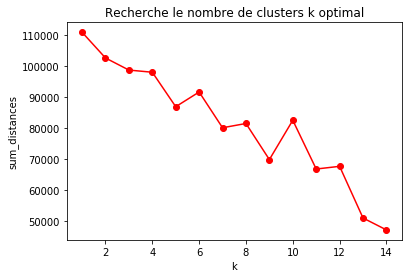

In [75]:
# Search for the optimal hyperparameter k
sum_distances = []
K = range(1,15)
for k in K:
    km = KModes(n_clusters=k, init='random')
    km.fit_predict(OH_cols)
    sum_distances.append(km.cost_)
kk = sum_distances.index(min(sum_distances)) + 1

print("le nombre de clusters optimal est : {}".format(kk))

plt.plot(K, sum_distances, 'ro-')
plt.xlabel('k')
plt.ylabel('sum_distances')
plt.title('Recherche le nombre de clusters k optimal')

plt.show()

In [68]:
# Group related categories
km = KModes(n_clusters=kk, init='random', n_init=kk+1)
km.fit_predict(OH_cols)
kmodes = km.cluster_centroids_
shape = kmodes.shape
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("cluster sans catégorie")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in OH_cols.columns[np.nonzero(cent)]:
            print(j)


cluster 0: 
cluster sans catégorie

cluster 1: 
cama_mesa_banho

cluster 2: 
cluster sans catégorie

cluster 3: 
moveis_decoracao

cluster 4: 
telefonia

cluster 5: 
beleza_saude

cluster 6: 
cool_stuff

cluster 7: 
moveis_escritorio

cluster 8: 
esporte_lazer

cluster 9: 
informatica_acessorios

cluster 10: 
cluster sans catégorie

cluster 11: 
ferramentas_jardim


In [77]:
donnees["product_category_name"].value_counts()[:20]

cama_mesa_banho                11114
beleza_saude                   9670 
esporte_lazer                  8639 
moveis_decoracao               8331 
informatica_acessorios         7827 
utilidades_domesticas          6964 
relogios_presentes             5991 
telefonia                      4543 
ferramentas_jardim             4346 
automotivo                     4235 
brinquedos                     4117 
cool_stuff                     3793 
perfumaria                     3419 
bebes                          3065 
eletronicos                    2767 
papelaria                      2517 
fashion_bolsas_e_acessorios    2031 
pet_shop                       1947 
moveis_escritorio              1691 
consoles_games                 1137 
Name: product_category_name, dtype: int64

<BarContainer object of 14 artists>

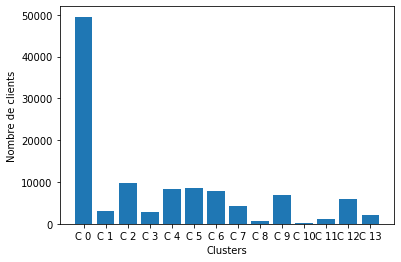

In [78]:
x = []
y = []
for i in range(0, kk):
    x.append("C " + str(i))
    y.append(np.sum(km.labels_== i))
    
plt.xlabel('Clusters')
plt.ylabel('Nombre de clients')
plt.bar(x, y)

In [79]:
# Machine Learning Algorithms

In [130]:
# To scale the features 
X = segmented_rfm[["recency", "frequency", "monetary_value"]]

X_scale = preprocessing.StandardScaler().fit_transform(X)

In [81]:
# K-means algorithm

le nombre de clusters optimal est : 5


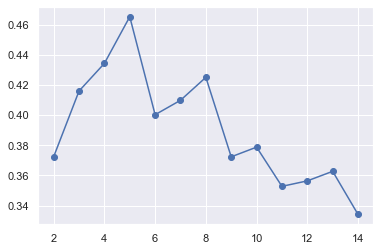

In [322]:
# Search for the optimal hyperparameter k
silhouettes = []
sum_mean_square_distances = []
for num_clusters in range(2, 15):
    cls = KMeans(n_clusters=num_clusters, init="random")
    cls.fit(X_scale)
    score = metrics.silhouette_score(X_scale, cls.labels_)
    silhouettes.append(score)
n_clusters = silhouettes.index(max(silhouettes)) + 2

print("le nombre de clusters optimal est : {}".format(n_clusters)) 

plt.plot(range(2, 15), silhouettes, marker="o")

Valeur expliquée par les deux premières composantes : 0.730
Pour n_clusters = 5 , Le score de la silhouette moyenne est : 0.43865662259000376


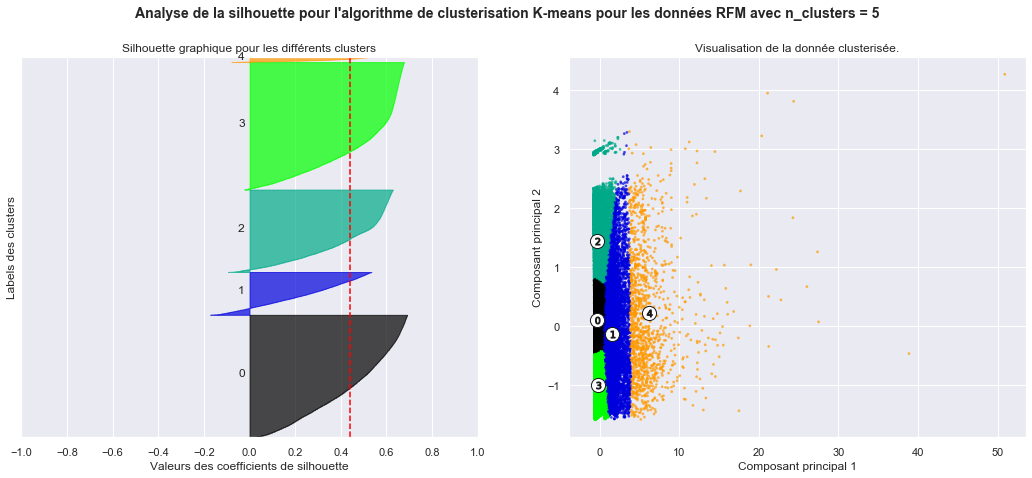

In [323]:
pca = PCA(n_components=2).fit(X_scale)
reduced_data = pca.transform(X_scale)
print("Valeur expliquée par les deux premières composantes : %.3f" \
      % pca.explained_variance_ratio_.cumsum()[1])

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# Plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=n_clusters, init="random")
cluster_labels = clusterer.fit_predict(reduced_data)

# The silhouette_score gives the average value for all the samples.
silhouette_avg = metrics.silhouette_score(reduced_data, cluster_labels)
print("Pour n_clusters =", n_clusters, ", Le score de la silhouette moyenne est :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(reduced_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # luster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
ax1.set_title("Silhouette graphique pour les différents clusters")
ax1.set_xlabel("Valeurs des coefficients de silhouette")
ax1.set_ylabel("Labels des clusters")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-1, -0.8, -0.6, -0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0,
            alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualisation de la donnée clusterisée.")
    ax2.set_xlabel("Composant principal 1")
    ax2.set_ylabel("Composant principal 2")

    plt.suptitle(("Analyse de la silhouette pour l'algorithme de clusterisation K-means pour les données RFM "
                  "avec n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
plt.show()

In [324]:
X1 = X.copy()
X1["cluster_appartenance"] = cluster_labels
stats1 = X1.groupby('cluster_appartenance')[['recency', "frequency", "monetary_value"]]. \
            agg([np.mean])
st1 = stats1.copy()
st1["size"] = X1.groupby('cluster_appartenance')[['recency']].agg([np.size]) 
st1

recency frequency monetary_value   size
                            mean      mean           mean       
cluster_appartenance                                            
0                     260.252428  1.009710  95.917209      30278
1                     213.097064  1.949863  348.285572     10591
2                     465.209752  1.078583  112.536576     20386
3                     89.270329   1.037758  98.936895      31543
4                     239.259630  3.919877  1080.644931    1298

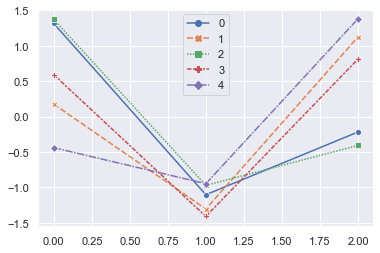

In [325]:
vm = pd.DataFrame(stats1.values.T)
stand = preprocessing.StandardScaler().fit_transform(vm)
sns.set()
sns.lineplot(data=stand, hue="Clusters", markers=True)

In [326]:
stats1 = stats1.rename(index={0: "best customer", 1: "promissing",
                              2: "Lost customers", 3: "Hibernating"}
                      )
stats1

recency frequency monetary_value
                            mean      mean           mean
cluster_appartenance                                     
best customer         260.252428  1.009710  95.917209    
promissing            213.097064  1.949863  348.285572   
Lost customers        465.209752  1.078583  112.536576   
Hibernating           89.270329   1.037758  98.936895    
4                     239.259630  3.919877  1080.644931

In [327]:
population_avg = X.mean()
cluster_avg = X1.groupby(['cluster_appartenance']).mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp = relative_imp.rename(index={0: "best customer", 1: "promissing",
                                          2: "Lost customers", 3: "Hibernating"}
                                  )

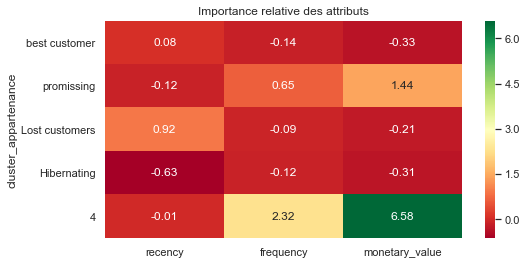

In [328]:
plt.figure(figsize=(8, 4))
ax = sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
ax.set_ylim(len(relative_imp), 0)
plt.title('Importance relative des attributs')
plt.show()

Pour n_clusters = 4 , Le score de la silhouette moyenne est : 0.350825


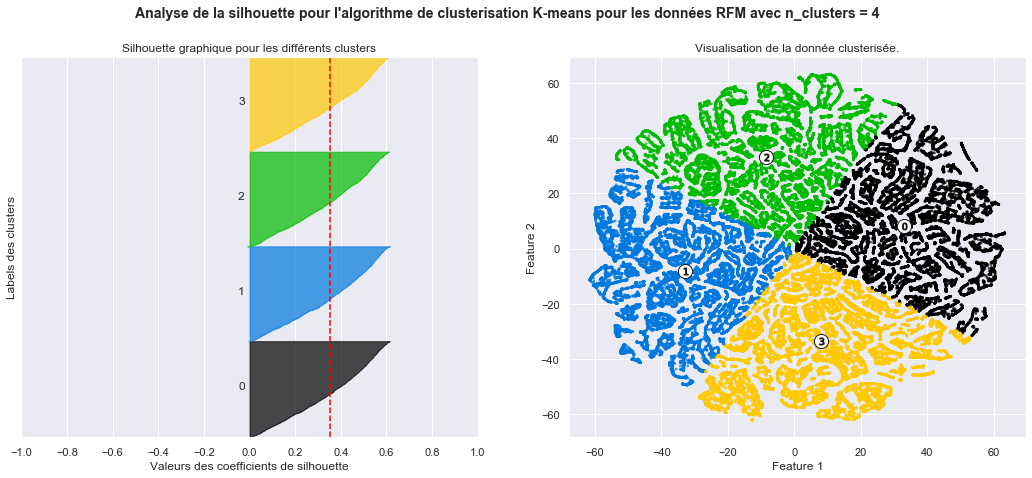

In [89]:
reduced_data = TSNE(n_components=2).fit_transform(X_scale)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=n_clusters, init="random")
cluster_labels2 = clusterer.fit_predict(reduced_data)

# The silhouette_score gives the average value for all the samples.
silhouette_avg = metrics.silhouette_score(reduced_data, cluster_labels2)
print("Pour n_clusters =", n_clusters, ", Le score de la silhouette moyenne est :", silhouette_avg)
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(reduced_data, cluster_labels2)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels2 == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
    
ax1.set_title("Silhouette graphique pour les différents clusters")
ax1.set_xlabel("Valeurs des coefficients de silhouette")
ax1.set_ylabel("Labels des clusters")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-1, -0.8, -0.6, -0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels2.astype(float) / n_clusters)

ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0,
            alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualisation de la donnée clusterisée.")
    ax2.set_xlabel("Feature 1")
    ax2.set_ylabel("Feature 2")

    plt.suptitle(("Analyse de la silhouette pour l'algorithme de clusterisation K-means pour les données RFM "
                  "avec n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
plt.show()

In [90]:
X2 = X.copy()
X2["cluster_appartenance"] = cluster_labels2
stats2 = X2.groupby('cluster_appartenance')[['recency', "frequency", "monetary_value"]]. \
            agg([np.mean])
st2 = stats2.copy()
st2["size"] = X2.groupby('cluster_appartenance')[['recency']].agg([np.size]) 
st2

recency frequency monetary_value   size
                            mean      mean           mean       
cluster_appartenance                                            
0                     273.307770  1.000000  149.439108     23771
1                     204.082814  1.435437  161.533647     23450
2                     203.626122  1.067077  99.637719      23406
3                     285.414760  1.219694  159.277620     23469

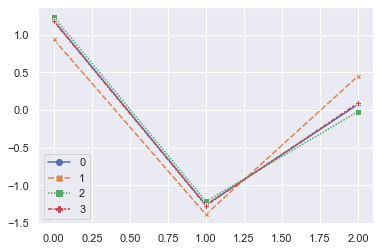

In [91]:
vm = pd.DataFrame(stats2.values.T)
stand = preprocessing.StandardScaler().fit_transform(vm)
sns.set()
sns.lineplot(data=stand, markers=True)

In [92]:
stats2 = stats2.rename(index={0: "best customer", 1: "promissing",
                              2: "Lost customers", 3: "Hibernating"}
                      )
stats2

recency frequency monetary_value
                            mean      mean           mean
cluster_appartenance                                     
best customer         273.307770  1.000000  149.439108   
promissing            204.082814  1.435437  161.533647   
Lost customers        203.626122  1.067077  99.637719    
Hibernating           285.414760  1.219694  159.277620

In [93]:
population_avg = X.mean()
cluster_avg = X2.groupby(['cluster_appartenance']).mean()
relative_imp2 = cluster_avg / population_avg - 1
relative_imp2 = relative_imp.rename(index={0: "best customer", 1: "promissing",
                                           2: "Lost customers", 3: "Hibernating"}
                                   )

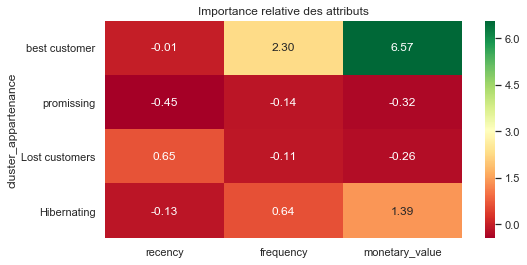

In [94]:
plt.figure(figsize=(8, 4))
ax = sns.heatmap(data=relative_imp2, annot=True, fmt='.2f', cmap='RdYlGn')
ax.set_ylim(len(relative_imp), 0)
plt.title('Importance relative des attributs')
plt.show()

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

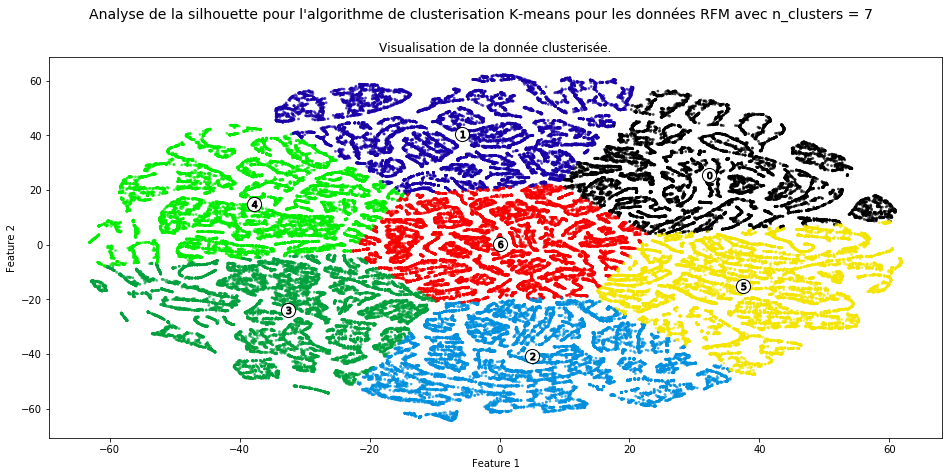

In [60]:
n_clusters_fix = 7
reduced_data = TSNE(n_components=2).fit_transform(X_scale)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(16, 7)

clusterer = KMeans(n_clusters=n_clusters_fix, init="random")
cluster_labels2 = clusterer.fit_predict(reduced_data)

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels2.astype(float) / n_clusters_fix)

ax1.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0,
            alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax1.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax1.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax1.set_title("Visualisation de la donnée clusterisée.")
    ax1.set_xlabel("Feature 1")
    ax1.set_ylabel("Feature 2")

    plt.suptitle(("Analyse de la silhouette pour l'algorithme de clusterisation K-means pour les données RFM "
                  "avec n_clusters = %d" % n_clusters_fix
                 ), fontsize=14, fontweight='bold')
plt.show()

In [203]:
X3 = X.copy()
X3["cluster_appartenance"] = cluster_labels2
stats3 = X3.groupby('cluster_appartenance')[['recency', "frequency", "monetary_value"]].agg([np.mean])
st3 = stats3.copy()
st3["size"] = X3.groupby('cluster_appartenance')[['recency']].agg([np.size]) 
st3

recency frequency monetary_value   size
                            mean      mean           mean       
cluster_appartenance                                            
0                     282.465746  1.142174  206.157337     13181
1                     262.718557  1.151390  205.998394     13310
2                     143.245024  1.055499  127.682027     12811
3                     214.657570  1.368964  144.244642     13191
4                     216.741631  1.005912  76.891943      13024
5                     298.789263  1.198567  128.130671     12983
6                     266.630162  1.308733  112.071225     15596

In [158]:
X3.shape

(94096, 4)

In [205]:
dist = {}
for key, value in cus_id.items(): 
    d = []
    for c in range (0, 7):
        count = 0
        for j, row in X3.iterrows():
            if row["cluster_appartenance"] == c and j in value:
                count += 1
        d.append(count)
    dist[key] = d

In [206]:
dist

{'Best Customers': [236, 855, 10, 244, 0, 137, 0],
 'Loyal Customers': [611, 1108, 2791, 3114, 3404, 557, 3303],
 'Promissing': [3519, 0, 8246, 0, 3497, 3062, 3559],
 'Big Spenders': [848, 3919, 154, 2761, 0, 666, 499],
 'Almost Lost': [2254, 2942, 859, 989, 1760, 1428, 637],
 'Lost Customers': [1679, 3273, 87, 4700, 4286, 3969, 3964],
 'Lost Cheap Customers': [4002, 1213, 0, 1211, 0, 2839, 1785],
 'Autres': [32, 0, 664, 172, 77, 325, 1849]}

In [207]:
pd.DataFrame.from_dict(dist)

Best Customers  Loyal Customers  Promissing  Big Spenders  Almost Lost  \
0  236             611              3519        848           2254          
1  855             1108             0           3919          2942          
2  10              2791             8246        154           859           
3  244             3114             0           2761          989           
4  0               3404             3497        0             1760          
5  137             557              3062        666           1428          
6  0               3303             3559        499           637           

   Lost Customers  Lost Cheap Customers  Autres  
0  1679            4002                  32      
1  3273            1213                  0       
2  87              0                     664     
3  4700            1211                  172     
4  4286            0                     77      
5  3969            2839                  325     
6  3964            1785                  1849

In [100]:
stats3 = stats3.rename(index={0: "Promissing", 1: "Big Spenders",
                              2: "Loyal Customers", 3: "Lost Cheap Customers",
                              4: "Best Customers", 5: "Lost Customers",6: "Almost Lost"
                             }
                      )

In [101]:
stats3

recency frequency monetary_value
                            mean      mean           mean
cluster_appartenance                                     
Promissing            282.465746  1.142174  206.157337   
Big Spenders          262.718557  1.151390  205.998394   
Loyal Customers       143.245024  1.055499  127.682027   
Lost Cheap Customers  214.657570  1.368964  144.244642   
Best Customers        216.741631  1.005912  76.891943    
Lost Customers        298.789263  1.198567  128.130671   
Almost Lost           266.630162  1.308733  112.071225

In [ ]:
# DBSCAN Algorithm 

In [ ]:
sns.set(style="ticks", color_codes=True)
eps = [0.5, 2]
neighs = [3, 5]
silhouettes = []
i = 0
score_max = 0
v_eps = 0
v_neigh = 0
for ep in eps:
    for n in neighs:
        db = DBSCAN(eps=ep, min_samples=n).fit(X_scale)
        score = metrics.silhouette_score(X_scale, db.labels_)
        silhouettes.append(score)
        if i == 0:
            v_eps = ep
            v_neigh = n
            score_max = score
            i += 1
        else:
            if score > score_max:
                v_eps = ep
                v_neigh = n
                score_max = score
print(v_eps)
print(v_neigh)
sns.lineplot(x=eps, y=silhouettes, hue=[3, 5, 3, 5], marker="o")

In [132]:
v_eps = 1

Estimated number of clusters: 165
Estimated number of noise points: 6
Silhouette Coefficient: -0.064


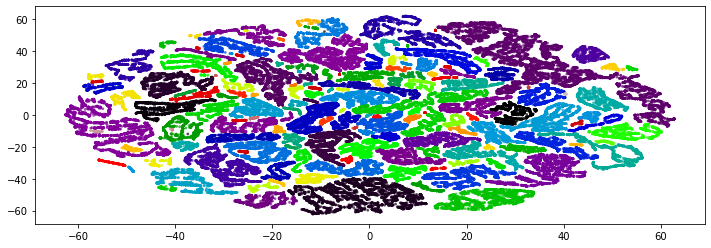

In [133]:
reduced_data = TSNE(n_components=2).fit_transform(X_scale)

db = DBSCAN(eps=v_eps, min_samples=10).fit(reduced_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(reduced_data, labels))

# Black removed and is used for noise instead.
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
ax1.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')
plt.show()

In [111]:
# Agglomerative clustering

In [112]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

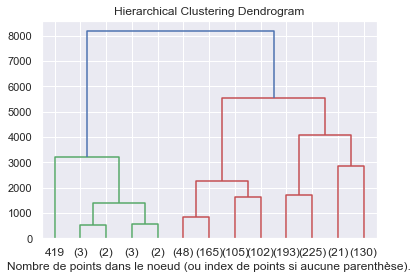

In [154]:
# Setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X[:1000])
plt.title('Hierarchical Clustering Dendrogram')

# Plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Nombre de points dans le noeud (ou index de points si aucune parenthèse).")
plt.show()

In [146]:
clustering = AgglomerativeClustering(n_clusters = 4).fit(X_scale[:1000])
   clustering.labels_[:10]

array([3, 3, 2, 2, 2, 3, 3, 0, 2, 3], dtype=int64)